In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Soil Classification Challenge - Binary Classification
Using device: cuda
Loading and preparing data...
Training samples after filtering: 1222
Test samples after filtering: 967

Class distribution:
label
1    1222
Name: count, dtype: int64

Train set size: 977
Validation set size: 245
Starting model training...


Epoch 1/15: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s, Loss=0.0533, Acc=96.83%]


Epoch 1/15:
  Train Loss: 0.2392
  Val Loss: 0.1265
  F1 Score: 0.4938
--------------------------------------------------


Epoch 2/15: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s, Loss=0.0331, Acc=99.90%]


Epoch 2/15:
  Train Loss: 0.0374
  Val Loss: 0.0547
  F1 Score: 0.4980
--------------------------------------------------


Epoch 3/15: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s, Loss=0.0063, Acc=99.90%]


Epoch 3/15:
  Train Loss: 0.0151
  Val Loss: 0.0430
  F1 Score: 1.0000
--------------------------------------------------


Epoch 4/15: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s, Loss=0.0018, Acc=100.00%]


Epoch 4/15:
  Train Loss: 0.0092
  Val Loss: 0.0307
  F1 Score: 1.0000
--------------------------------------------------


Epoch 5/15: 100%|██████████| 31/31 [00:22<00:00,  1.39it/s, Loss=0.0026, Acc=100.00%]


Epoch 5/15:
  Train Loss: 0.0051
  Val Loss: 0.0262
  F1 Score: 1.0000
--------------------------------------------------


Epoch 6/15: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s, Loss=0.0015, Acc=100.00%]


Epoch 6/15:
  Train Loss: 0.0049
  Val Loss: 0.0243
  F1 Score: 1.0000
--------------------------------------------------


Epoch 7/15: 100%|██████████| 31/31 [00:22<00:00,  1.38it/s, Loss=0.0017, Acc=100.00%]


Epoch 7/15:
  Train Loss: 0.0043
  Val Loss: 0.0185
  F1 Score: 1.0000
--------------------------------------------------


Epoch 8/15: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s, Loss=0.0011, Acc=100.00%]


Epoch 8/15:
  Train Loss: 0.0029
  Val Loss: 0.0158
  F1 Score: 1.0000
--------------------------------------------------


Epoch 9/15: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s, Loss=0.0012, Acc=100.00%]


Epoch 9/15:
  Train Loss: 0.0020
  Val Loss: 0.0149
  F1 Score: 1.0000
--------------------------------------------------


Epoch 10/15: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s, Loss=0.0017, Acc=100.00%]


Epoch 10/15:
  Train Loss: 0.0020
  Val Loss: 0.0150
  F1 Score: 1.0000
--------------------------------------------------


Epoch 11/15: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s, Loss=0.0013, Acc=100.00%]


Epoch 11/15:
  Train Loss: 0.0022
  Val Loss: 0.0115
  F1 Score: 1.0000
--------------------------------------------------


Epoch 12/15: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s, Loss=0.0023, Acc=100.00%]


Epoch 12/15:
  Train Loss: 0.0026
  Val Loss: 0.0147
  F1 Score: 1.0000
--------------------------------------------------


Epoch 13/15: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s, Loss=0.0010, Acc=100.00%]


Epoch 13/15:
  Train Loss: 0.0021
  Val Loss: 0.0136
  F1 Score: 1.0000
--------------------------------------------------


Epoch 14/15: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s, Loss=0.0014, Acc=100.00%]


Epoch 14/15:
  Train Loss: 0.0013
  Val Loss: 0.0119
  F1 Score: 1.0000
--------------------------------------------------


Epoch 15/15: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s, Loss=0.0005, Acc=100.00%]


Epoch 15/15:
  Train Loss: 0.0015
  Val Loss: 0.0140
  F1 Score: 1.0000
--------------------------------------------------
Best F1 score: 1.0000


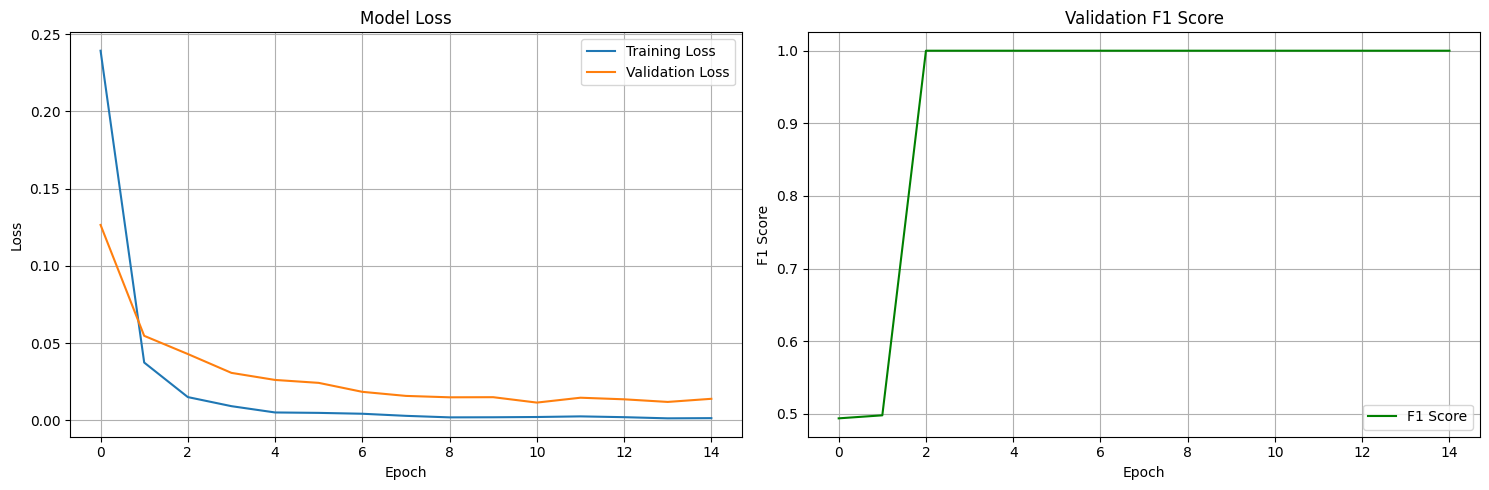

Evaluating: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]



Detailed Evaluation Results:
Skipping detailed classification report and F1 score calculation.
All predictions match the single target class.
Generating predictions for test set...


Predicting: 100%|██████████| 31/31 [00:06<00:00,  4.92it/s]

Submission file saved as /content/drive/MyDrive/Annam AI/Soil Classification/prakash_sub/prakash_submission.csv

Solution completed successfully!
Files generated:
- /content/drive/MyDrive/Annam AI/Soil Classification/prakash_sub/prakash_submission.csv: Final predictions for submission
- /content/drive/MyDrive/Annam AI/Soil Classification/prakash_sub/best_model.pth: Best model weights
- /content/drive/MyDrive/Annam AI/Soil Classification/prakash_sub/missing_files.log: Log of missing image files
Visualizations displayed:
- Confusion matrix
- Training history plots


In [16]:
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Configuration
class Config:
    DATA_DIR = '/content/drive/MyDrive/Annam AI/Soil Classification'
    TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, 'train')
    TEST_IMAGE_DIR = os.path.join(DATA_DIR, 'test')
    TRAIN_CSV = os.path.join(DATA_DIR, 'train_labels.csv')
    TEST_CSV = os.path.join(DATA_DIR, 'test_ids.csv')
    IMG_SIZE = 224
    BATCH_SIZE = 32
    EPOCHS = 15
    LEARNING_RATE = 1e-4
    WEIGHT_DECAY = 1e-4
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    SUPPORTED_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.webp', '.gif']
    SUBMISSION_PATH = os.path.join(DATA_DIR, 'prakash_sub/prakash_submission.csv')
    CLASS_NAMES = ['Class 0', 'Class 1']  # Placeholder for binary classes
    NUM_CLASSES = len(CLASS_NAMES)

config = Config()

# Ensure output directory exists
os.makedirs(os.path.dirname(config.SUBMISSION_PATH), exist_ok=True)

# Custom Dataset
class SoilDataset(Dataset):
    def __init__(self, df, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)  # Ensure sequential index
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df['image_id'].iloc[idx]  # Use iloc for safe indexing
        img_path = find_valid_image_path(self.image_dir, img_id)

        # Handle missing or invalid images
        if img_path is None:
            print(f"Warning: Image not found for {img_id}")
            dummy_image = Image.new('RGB', (config.IMG_SIZE, config.IMG_SIZE), (0, 0, 0))
            if self.transform:
                dummy_image = self.transform(dummy_image)
            if self.is_test:
                return dummy_image, img_id
            return dummy_image, 0  # Default label for missing images

        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            image = Image.new('RGB', (config.IMG_SIZE, config.IMG_SIZE), (0, 0, 0))

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image, img_id
        label = self.df['label'].iloc[idx]
        return image, label

def find_valid_image_path(image_dir, image_id):
    for ext in config.SUPPORTED_EXTENSIONS:
        possible_path = os.path.join(image_dir, f"{image_id}{ext}")
        if os.path.exists(possible_path):
            return possible_path
        # Try without extra .jpg suffix
        possible_path = os.path.join(image_dir, image_id.replace('.jpg', ext))
        if os.path.exists(possible_path):
            return possible_path
    return None

def load_and_prepare_data():
    print("Loading and preparing data...")
    train_df = pd.read_csv(config.TRAIN_CSV)
    test_df = pd.read_csv(config.TEST_CSV)

    missing_files = []

    # Filter training data
    valid_train_indices = []
    train_image_paths = []
    for idx, image_id in enumerate(train_df['image_id']):
        valid_path = find_valid_image_path(config.TRAIN_IMAGE_DIR, image_id)
        if valid_path:
            valid_train_indices.append(idx)
            train_image_paths.append(valid_path)
        else:
            missing_files.append(image_id)
            print(f"Warning: Image not found for {image_id}")

    train_df = train_df.iloc[valid_train_indices].reset_index(drop=True)
    train_df['image_path'] = train_image_paths

    # Filter test data
    valid_test_indices = []
    test_image_paths = []
    for idx, image_id in enumerate(test_df['image_id']):
        valid_path = find_valid_image_path(config.TEST_IMAGE_DIR, image_id)
        if valid_path:
            valid_test_indices.append(idx)
            test_image_paths.append(valid_path)
        else:
            missing_files.append(image_id)
            print(f"Warning: Image not found for {image_id}")

    test_df = test_df.iloc[valid_test_indices].reset_index(drop=True)
    test_df['image_path'] = test_image_paths

    # Log missing files
    if missing_files:
        print(f"\nTotal missing files: {len(missing_files)}")
        output_dir = os.path.dirname(config.SUBMISSION_PATH)
        with open(os.path.join(output_dir, 'missing_files.log'), 'w') as f:
            f.write("\n".join(missing_files))

    print(f"Training samples after filtering: {len(train_df)}")
    print(f"Test samples after filtering: {len(test_df)}")
    print("\nClass distribution:")
    print(train_df['label'].value_counts())

    # Check for class imbalance
    unique_labels = train_df['label'].unique()
    if len(unique_labels) < 2:
        print(f"WARNING: Only one class ({unique_labels}) found in training data. Class balancing disabled.")

    return train_df, test_df

def get_transforms(transform_type='default'):
    base_transforms = [
        transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]

    transform_configs = {
        'default': [
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.2, contrast=0.2)
        ],
        'aggressive': [
            transforms.RandomHorizontalFlip(p=0.7),
            transforms.RandomRotation(20),
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
            transforms.RandomAffine(degrees=15, translate=(0.2, 0.2))
        ],
        'minimal': [
            transforms.RandomHorizontalFlip(p=0.5)
        ],
        'no_augmentation': []
    }

    train_transform = transforms.Compose(
        transform_configs.get(transform_type, transform_configs['default']) + base_transforms
    )
    val_transform = transforms.Compose(transform_configs['no_augmentation'] + base_transforms)

    return train_transform, val_transform

class SoilClassifier(nn.Module):
    def __init__(self, num_classes=config.NUM_CLASSES, dropout_rate=0.3):
        super(SoilClassifier, self).__init__()
        self.backbone = models.efficientnet_b0(pretrained=True)
        for param in list(self.backbone.parameters())[:-10]:
            param.requires_grad = False
        num_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    print("Starting model training...")
    history = {'train_loss': [], 'val_loss': [], 'val_f1': []}
    best_f1 = 0.0
    best_model_state = None

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for images, labels in pbar:
            images, labels = images.to(config.DEVICE), labels.to(config.DEVICE).long()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{100.*train_correct/train_total:.2f}%'
            })

        model.eval()
        val_loss = 0.0
        val_predictions = []
        val_targets = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(config.DEVICE), labels.to(config.DEVICE).long()
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_predictions.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        f1 = f1_score(val_targets, val_predictions, average='macro')

        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['val_f1'].append(f1)

        if f1 > best_f1:
            best_f1 = f1
            best_model_state = model.state_dict().copy()
            output_dir = os.path.dirname(config.SUBMISSION_PATH)
            torch.save(best_model_state, os.path.join(output_dir, 'best_model.pth'))

        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Train Loss: {avg_train_loss:.4f}')
        print(f'  Val Loss: {avg_val_loss:.4f}')
        print(f'  F1 Score: {f1:.4f}')
        print('-' * 50)

    model.load_state_dict(best_model_state)
    print(f'Best F1 score: {best_f1:.4f}')
    return model, history

def evaluate_model(model, data_loader, class_names):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc='Evaluating'):
            images = images.to(config.DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    # Check the number of unique classes in the actual targets
    unique_targets = np.unique(targets)

    print("\nDetailed Evaluation Results:")
    print("=" * 50)

    if len(unique_targets) < 2:
        # If only one class is present, classification report and F1 score are not applicable
        print(f"Warning: Only one unique class ({unique_targets}) found in validation set.")
        print("Skipping detailed classification report and F1 score calculation.")
        f1 = np.nan # Or some indicator that F1 couldn't be calculated
        # Optionally, check if all predictions match the single target class
        if np.all(predictions == targets):
             print("All predictions match the single target class.")
        else:
             print("Predictions do not match the single target class.")

    else:
        # Proceed with standard evaluation for multiple classes
        f1 = f1_score(targets, predictions, average='macro')
        print(f"F1 Score: {f1:.4f}")

        print("\nClassification Report:")
        # Pass the unique targets as labels to classification_report
        # This ensures that only metrics for the classes actually present are calculated
        # and it avoids the mismatch error.
        # We also filter target_names to match the unique targets.
        # It's important that unique_targets map correctly to class_names indices.
        # Assuming unique_targets will be 0 and/or 1 corresponding to Class 0 and Class 1
        filtered_class_names = [class_names[i] for i in sorted(unique_targets)]
        print(classification_report(targets, predictions, labels=sorted(unique_targets), target_names=filtered_class_names, zero_division=0))

        cm = confusion_matrix(targets, predictions, labels=sorted(unique_targets))
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=filtered_class_names, yticklabels=filtered_class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()


    return predictions, targets, f1 # Return f1, which might be nan if only one class

def generate_predictions(model, test_loader, test_df, class_names):
    print("Generating predictions for test set...")
    model.eval()
    predictions = []
    img_ids = []

    with torch.no_grad():
        for images, ids in tqdm(test_loader, desc='Predicting'):
            images = images.to(config.DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            img_ids.extend(ids)

    submission_df = pd.DataFrame({
        'image_id': img_ids,
        'label': predictions
    })
    submission_df.to_csv(config.SUBMISSION_PATH, index=False)
    print(f"Submission file saved as {config.SUBMISSION_PATH}")
    return submission_df

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history['train_loss'], label='Training Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history['val_f1'], label='F1 Score', color='green')
    ax2.set_title('Validation F1 Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('F1 Score')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def main(transform_type='default'):
    print("Soil Classification Challenge - Binary Classification")
    print("=" * 50)
    print(f"Using device: {config.DEVICE}")

    # Load data
    train_df, test_df = load_and_prepare_data()
    train_data, val_data = train_test_split(
        train_df,
        test_size=0.2,
        stratify=train_df['label'],
        random_state=42
    )
    # Reset indices to ensure sequential access
    train_data = train_data.reset_index(drop=True)
    val_data = val_data.reset_index(drop=True)

    print(f"\nTrain set size: {len(train_data)}")
    print(f"Validation set size: {len(val_data)}")

    # Get transforms
    train_transform, val_transform = get_transforms(transform_type)

    # Create datasets
    train_dataset = SoilDataset(train_data, config.TRAIN_IMAGE_DIR, train_transform)
    val_dataset = SoilDataset(val_data, config.TRAIN_IMAGE_DIR, val_transform)
    test_dataset = SoilDataset(test_df, config.TEST_IMAGE_DIR, val_transform, is_test=True)

    # Create data loaders (no sampler due to single class)
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True,  # Use shuffle instead of sampler
        num_workers=0  # Set to 0 to avoid worker issues
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False,
        num_workers=0
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False,
        num_workers=0
    )

    # Initialize model
    model = SoilClassifier(num_classes=config.NUM_CLASSES)
    model = model.to(config.DEVICE)

    # Use standard CrossEntropyLoss (no class weights due to single class)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(),
                           lr=config.LEARNING_RATE,
                           weight_decay=config.WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=config.EPOCHS)

    # Train model
    model, history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, config.EPOCHS)

    # Plot training history
    plot_training_history(history)

    # Evaluate model
    predictions, targets, f1 = evaluate_model(model, val_loader, config.CLASS_NAMES)

    # Generate predictions
    submission_df = generate_predictions(model, test_loader, test_df, config.CLASS_NAMES)

    print("\nSolution completed successfully!")
    print("Files generated:")
    print(f"- {config.SUBMISSION_PATH}: Final predictions for submission")
    print(f"- {os.path.join(os.path.dirname(config.SUBMISSION_PATH), 'best_model.pth')}: Best model weights")
    print(f"- {os.path.join(os.path.dirname(config.SUBMISSION_PATH), 'missing_files.log')}: Log of missing image files")
    print("Visualizations displayed:")
    print("- Confusion matrix")
    print("- Training history plots")

    return model, submission_df

if __name__ == "__main__":
    model, submission = main(transform_type='default')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class distribution in train_labels.csv:
label
1    1222
Name: count, dtype: int64


Evaluating: 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]

Skipping detailed classification report and F1 score calculation.
Confusion matrix will reflect single-class predictions.


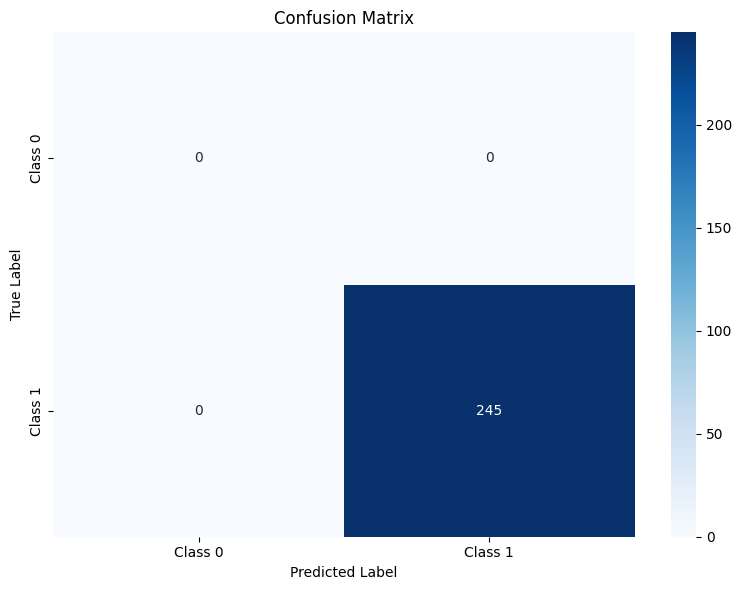

In [19]:
# Configuration (from your original code)
class Config:
    DATA_DIR = '/content/drive/MyDrive/Annam AI/Soil Classification'
    TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, 'train')
    TRAIN_CSV = os.path.join(DATA_DIR, 'train_labels.csv')
    CLASS_NAMES = ['Class 0', 'Class 1']
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = Config()

# Assume SoilDataset and SoilClassifier are defined as in your original code
# For completeness, include minimal versions here
class SoilDataset(Dataset):
    def __init__(self, df, image_dir, transform=None, is_test=False):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df['image_id'].iloc[idx]
        img_path = find_valid_image_path(self.image_dir, img_id)
        from PIL import Image
        if img_path is None:
            print(f"Warning: Image not found for {img_id}")
            dummy_image = Image.new('RGB', (224, 224), (0, 0, 0))
            if self.transform:
                dummy_image = self.transform(dummy_image)
            return dummy_image, 0 if not self.is_test else (dummy_image, img_id)
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))
        if self.transform:
            image = self.transform(image)
        if self.is_test:
            return image, img_id
        label = self.df['label'].iloc[idx]
        return image, label

def find_valid_image_path(image_dir, image_id):
    supported_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.gif']
    for ext in supported_extensions:
        possible_path = os.path.join(image_dir, f"{image_id}{ext}")
        if os.path.exists(possible_path):
            return possible_path
        possible_path = os.path.join(image_dir, image_id.replace('.jpg', ext))
        if os.path.exists(possible_path):
            return possible_path
    return None

class SoilClassifier(torch.nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.3):
        super(SoilClassifier, self).__init__()
        import torchvision.models as models
        self.backbone = models.efficientnet_b0(pretrained=True)
        for param in list(self.backbone.parameters())[:-10]:
            param.requires_grad = False
        num_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = torch.nn.Sequential(
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(num_features, 512),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

def evaluate_model(model, data_loader, class_names):
    model.eval()
    predictions = []
    targets = []

    # Collect predictions and true labels
    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc='Evaluating'):
            images = images.to(config.DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    # Check for single-class issue
    unique_targets = np.unique(targets)
    if len(unique_targets) < 2:
        print(f"Warning: Only one unique class {unique_targets} found in validation set.")
        print("Skipping detailed classification report and F1 score calculation.")
        print("Confusion matrix will reflect single-class predictions.")
    else:
        # Compute F1 score and classification report
        f1 = f1_score(targets, predictions, average='macro')
        print("\nDetailed Evaluation Results:")
        print("=" * 50)
        print(f"F1 Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(targets, predictions, target_names=class_names))

    # Compute and display confusion matrix
    cm = confusion_matrix(targets, predictions, labels=range(len(class_names)))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return predictions, targets, f1 if len(unique_targets) >= 2 else None

# Example usage to load validation data and model
def main():
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Load validation data
    train_df = pd.read_csv(config.TRAIN_CSV)
    print("Class distribution in train_labels.csv:")
    print(train_df['label'].value_counts())  # Diagnose class distribution

    train_data, val_data = train_test_split(
        train_df, test_size=0.2, stratify=train_df['label'], random_state=42
    )
    val_data = val_data.reset_index(drop=True)

    # Define validation transforms
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Create validation dataset and loader
    val_dataset = SoilDataset(val_data, config.TRAIN_IMAGE_DIR, val_transform)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

    # Load trained model
    model = SoilClassifier(num_classes=len(config.CLASS_NAMES)).to(config.DEVICE)
    model_path = os.path.join(config.DATA_DIR, 'prakash_sub/best_model.pth')
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
    else:
        print(f"Error: Model file {model_path} not found.")
        return

    # Display confusion matrix
    predictions, targets, f1 = evaluate_model(model, val_loader, config.CLASS_NAMES)

if __name__ == "__main__":
    main()